In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import folium
import matplotlib.image as mpimg
import json

import requests 
from pandas import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

---

# Data Collection

In [2]:
#importing us accident data
df_us_accident = pd.read_csv('US_Accidents_June20.csv')
display(df_us_accident.info())
display(df_us_accident.describe())

pd.set_option('display.max_columns', None) #for seeing all column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

None

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.478818e+06,3.513617e+06,3.513617e+06,3.513617e+06,1.034799e+06,1.034799e+06,3.513617e+06,1.250753e+06,3.447885e+06,1.645368e+06,3.443930e+06,3.457735e+06,3.437761e+06,3.059008e+06,1.487743e+06
mean,2.080226e+02,2.339929e+00,3.654195e+01,-9.579151e+01,3.755758e+01,-1.004560e+02,2.816167e-01,5.975383e+03,6.193512e+01,5.355730e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00,1.598256e-02
std,2.076627e+01,5.521935e-01,4.883520e+00,1.736877e+01,4.861215e+00,1.852879e+01,1.550134e+00,1.496624e+04,1.862106e+01,2.377334e+01,2.275558e+01,8.319758e-01,2.885879e+00,5.262847e+00,1.928262e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.363784e+01,-1.174418e+02,3.399477e+01,-1.183440e+02,0.000000e+00,8.640000e+02,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.591687e+01,-9.102601e+01,3.779736e+01,-9.703438e+01,0.000000e+00,2.798000e+03,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.032217e+01,-8.093299e+01,4.105139e+01,-8.210168e+01,1.000000e-02,7.098000e+03,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [3]:
#filtering data into city of Houston
df_houston = df_us_accident[df_us_accident['City'] == 'Houston']
df_houston.sample(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2867084,A-2867203,Bing,NaN,3,2020-03-22 12:27:17,2020-03-22 12:57:17,29.825800,-95.190300,29.8258,-95.1903,0.0,At TX-8-BELTWAY/Sam Houston Tlwy - Accident.,NaN,Crosby Fwy E,R,Houston,Harris,TX,77049,US,US/Central,KHOU,2020-03-22 12:53:00,72.0,72.0,78.0,30.08,8.0,ESE,10.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
513372,A-513378,MapQuest,201.0,2,2020-05-25 12:10:03,2020-05-25 12:54:39,29.936640,-95.507439,NaN,NaN,0.0,3 frontage lane blocked due to accident on TX-...,5499.0,N Sam Houston Pkwy W,L,Houston,Harris,TX,77086-1436,US,US/Central,KIAH,2020-05-25 11:53:00,79.0,79.0,66.0,29.66,10.0,SW,10.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
1431051,A-1431082,MapQuest,241.0,2,2019-01-28 06:56:47,2019-01-28 07:25:35,29.709639,-95.267891,NaN,NaN,0.0,Right and center lane blocked due to accident ...,NaN,La Porte Fwy E,R,Houston,Harris,TX,77012,US,US/Central,KHOU,2019-01-28 06:53:00,50.0,NaN,89.0,29.94,10.0,South,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
2148177,A-2148217,MapQuest,201.0,2,2018-01-23 15:21:46,2018-01-23 16:12:00,29.732052,-95.418678,NaN,NaN,0.0,Accident on Algerian Way at Kirby Dr.,2598.0,Algerian Way,R,Houston,Harris,TX,77098-4102,US,US/Central,KMCJ,2018-01-23 15:15:00,62.6,NaN,14.0,30.22,10.0,NNW,10.4,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2251192,A-2251232,MapQuest,201.0,2,2017-11-14 04:07:14,2017-11-14 04:36:11,29.737394,-95.521179,NaN,NaN,0.0,Accident on FM-1093 Westheimer Rd at Fondren Rd.,8901.0,Westheimer Rd,L,Houston,Harris,TX,77063-3601,US,US/Central,KMCJ,2017-11-14 03:55:00,62.6,NaN,88.0,30.18,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Night,Night


In [4]:
#extracting data complete information
display(df_houston.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101240 entries, 261018 to 3513354
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     101240 non-null  object 
 1   Source                 101240 non-null  object 
 2   TMC                    87901 non-null   float64
 3   Severity               101240 non-null  int64  
 4   Start_Time             101240 non-null  object 
 5   End_Time               101240 non-null  object 
 6   Start_Lat              101240 non-null  float64
 7   Start_Lng              101240 non-null  float64
 8   End_Lat                13339 non-null   float64
 9   End_Lng                13339 non-null   float64
 10  Distance(mi)           101240 non-null  float64
 11  Description            101239 non-null  object 
 12  Number                 42999 non-null   float64
 13  Street                 101240 non-null  object 
 14  Side                   101240 

None

In [5]:
#we want to cluster accident which have severity of 4, we should filter it more
df_houston4 = df_houston[df_houston['Severity'] == 4].reset_index(drop=True)
display(df_houston4.sample(5))
print(df_houston4.shape)
print(df_houston4.info())

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
326,A-2790949,Bing,NaN,4,2020-06-23 06:07:30,2020-06-23 07:07:30,29.776880,-95.384010,29.77706,-95.38310,0.056,Closed at Taylor St/Exit 767B - Road closed du...,NaN,US-90 E,R,Houston,Harris,TX,77007,US,US/Central,KMCJ,2020-06-23 05:53:00,76.0,76.0,87.0,29.86,10.0,SE,8.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
552,A-3207518,Bing,NaN,4,2019-01-26 09:01:31,2019-01-26 09:31:03,29.630513,-95.171997,29.63044,-95.16984,0.130,Closed at Beltway 8/E Sam Houston Pky S - Road...,1666.0,Genoa Red Bluff Rd,R,Houston,Harris,TX,77034-4111,US,US/Central,KHOU,2019-01-26 08:53:00,51.1,NaN,83.0,30.25,9.0,ENE,6.9,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
562,A-3216523,Bing,NaN,4,2018-12-08 22:19:44,2018-12-08 22:49:18,29.740576,-95.365545,29.74211,-95.36430,0.130,Closed at I-45/Gulf Fwy - Road closed due to a...,NaN,McGowen St,R,Houston,Harris,TX,77004,US,US/Central,KMCJ,2018-12-08 22:15:00,46.4,40.4,76.0,30.18,10.0,NNW,13.8,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
308,A-2777020,Bing,NaN,4,2020-05-19 10:30:03,2020-05-19 12:30:03,29.932920,-95.584980,29.93248,-95.58498,0.030,Closed at Fallbrook Dr - Road closed due to ac...,NaN,FM 1960 Rd W,R,Houston,Harris,TX,77065,US,US/Central,KDWH,2020-05-19 10:53:00,84.0,84.0,65.0,29.70,10.0,WSW,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
663,A-3308710,Bing,NaN,4,2018-06-15 15:12:01,2018-06-15 21:12:01,29.686330,-95.459080,29.67915,-95.44955,0.757,Closed at Braeswood Blvd/Post Oak/Exit 4 - Roa...,NaN,I-610 S,R,Houston,Harris,TX,77096,US,US/Central,KMCJ,2018-06-15 15:15:00,91.4,NaN,52.0,29.93,10.0,Calm,NaN,NaN,Scattered Clouds,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day


(907, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     907 non-null    object 
 1   Source                 907 non-null    object 
 2   TMC                    99 non-null     float64
 3   Severity               907 non-null    int64  
 4   Start_Time             907 non-null    object 
 5   End_Time               907 non-null    object 
 6   Start_Lat              907 non-null    float64
 7   Start_Lng              907 non-null    float64
 8   End_Lat                808 non-null    float64
 9   End_Lng                808 non-null    float64
 10  Distance(mi)           907 non-null    float64
 11  Description            907 non-null    object 
 12  Number                 112 non-null    float64
 13  Street                 907 non-null    object 
 14  Side                   907 non-null    object 
 

In [6]:
#because the maximum call limit for free foursquare is 950, we have to reduce the data in so it can do repeatly, sort by the worst distance after we reviewing the dup
#we need feature engineering the data, especially lat and long, because we have 2 (end and start), we will use the center point of it
df_houston4 = df_houston4.sort_values(by='Distance(mi)',ascending=False)
df_houston4['Lat'] = (df_houston4['Start_Lat']+df_houston4['End_Lat'])/2
df_houston4['Lng'] = (df_houston4['Start_Lng']+df_houston4['End_Lng'])/2


In [7]:
#dropping duplicates data 
df_houston4 = df_houston4.drop_duplicates(['Lat','Lng'], keep='first')

In [8]:
df_houston4.info()
df_houston4.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 386 to 906
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     663 non-null    object 
 1   Source                 663 non-null    object 
 2   TMC                    1 non-null      float64
 3   Severity               663 non-null    int64  
 4   Start_Time             663 non-null    object 
 5   End_Time               663 non-null    object 
 6   Start_Lat              663 non-null    float64
 7   Start_Lng              663 non-null    float64
 8   End_Lat                662 non-null    float64
 9   End_Lng                662 non-null    float64
 10  Distance(mi)           663 non-null    float64
 11  Description            663 non-null    object 
 12  Number                 63 non-null     float64
 13  Street                 663 non-null    object 
 14  Side                   663 non-null    object 
 15  City

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Lat,Lng
386,A-2927313,Bing,NaN,4,2020-04-21 20:34:23,2020-04-22 01:32:22,30.029330,-95.429180,29.773800,-95.367350,18.040,Closed between End of I-45 Hov Ln and I-10/US-...,NaN,I-45 N,R,Houston,Harris,TX,77090,US,US/Central,KDWH,2020-04-21 20:53:00,73.0,73.0,71.0,29.75,10.0,ESE,9.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,29.901565,-95.398265
813,A-3431656,Bing,NaN,4,2017-08-14 03:21:45,2017-08-14 09:21:45,29.932110,-95.509620,30.025168,-95.597998,8.326,Closed between Sam Houston Tollway and Tomball...,NaN,TX-249 N,R,Houston,Harris,TX,77086,US,US/Central,KIAH,2017-08-14 02:53:00,82.0,NaN,82.0,29.90,10.0,South,4.6,NaN,Scattered Clouds,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night,29.978639,-95.553809
422,A-3018284,Bing,NaN,4,2020-01-02 21:23:48,2020-01-03 02:22:31,29.912790,-95.412670,29.821760,-95.379190,6.602,Closed between West Rd and Frontage Rd/Exit 52...,NaN,I-45 S,R,Houston,Harris,TX,77037,US,US/Central,KIAH,2020-01-02 21:53:00,63.0,63.0,90.0,29.59,10.0,SSW,3.0,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,29.867275,-95.395930
51,A-1091939,MapQuest,201.0,4,2019-08-15 12:20:04,2019-08-15 13:18:34,29.795702,-95.450806,NaN,NaN,6.590,Main roadway closed due to accident on I-610 N...,NaN,I-610 N,R,Houston,Harris,TX,77092,US,US/Central,KMCJ,2019-08-15 11:53:00,91.0,91.0,57.0,29.93,10.0,VAR,6.0,0.00,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,NaN,NaN
818,A-3436946,Bing,NaN,4,2017-08-25 22:45:55,2017-08-26 04:45:55,29.997230,-95.579810,29.959981,-95.546511,3.255,Closed between Louetta Rd/Malcomson Rd and Gra...,NaN,TX-249 S,R,Houston,Harris,TX,77070,US,US/Central,KDWH,2017-08-25 22:53:00,77.0,NaN,90.0,29.83,10.0,ENE,11.5,0.11,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,29.978606,-95.563160


In [9]:
#it looks there is still a null value in a row (lat,lnt), we should drop the null value
df_houston4 = df_houston4.dropna(subset=['Lat'])

In [10]:
#shrink dataset into 500 datapoints
df_houston4 = df_houston4.head(300).reset_index(drop=True)

In [11]:
df_houston4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     300 non-null    object 
 1   Source                 300 non-null    object 
 2   TMC                    0 non-null      float64
 3   Severity               300 non-null    int64  
 4   Start_Time             300 non-null    object 
 5   End_Time               300 non-null    object 
 6   Start_Lat              300 non-null    float64
 7   Start_Lng              300 non-null    float64
 8   End_Lat                300 non-null    float64
 9   End_Lng                300 non-null    float64
 10  Distance(mi)           300 non-null    float64
 11  Description            300 non-null    object 
 12  Number                 11 non-null     float64
 13  Street                 300 non-null    object 
 14  Side                   300 non-null    object 
 15  City  

In [12]:
#dropping uneeded columns
uneeded_columns = ['Source','TMC','Start_Time','End_Time','Start_Lng','Start_Lat','End_Lat','End_Lng','Description','Number','Street','Side','City',\
                   'County','State','Zipcode','Country','Timezone','Airport_Code','Weather_Timestamp','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)',\
                   'Visibility(mi)','Wind_Direction','Wind_Speed(mph)','Precipitation(in)','Weather_Condition','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']

df_houston_loc = df_houston4.drop(uneeded_columns, axis=1)

In [13]:
display(df_houston_loc.describe())
display(df_houston_loc.describe(include='bool'))
display(df_houston_loc.head(5))

,Severity,Distance(mi),Lat,Lng
count,300.0,300.000000,300.000000,300.000000
mean,4.0,1.392160,29.855328,-95.286218
std,0.0,1.228515,0.857743,1.243116
min,4.0,0.674000,29.560813,-95.692525
25%,4.0,0.833750,29.708730,-95.458604
50%,4.0,1.102500,29.780157,-95.387883
75%,4.0,1.629500,29.850897,-95.327338
max,4.0,18.040000,40.254880,-80.182710


,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
count,300,300,300,300,300,300,300,300,300,300,300,300,300
unique,1,1,2,2,2,1,1,1,1,2,1,2,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,300,300,295,294,220,300,300,300,300,299,300,288,300


,ID,Severity,Distance(mi),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Lat,Lng
0,A-2927313,4,18.040,False,False,False,False,False,False,False,False,False,False,False,False,False,29.901565,-95.398265
1,A-3431656,4,8.326,False,False,False,False,True,False,False,False,False,False,False,False,False,29.978639,-95.553809
2,A-3018284,4,6.602,False,False,False,False,False,False,False,False,False,False,False,False,False,29.867275,-95.395930
3,A-3436946,4,3.255,False,False,False,False,False,False,False,False,False,False,False,False,False,29.978606,-95.563160
4,A-2885552,4,3.241,False,False,False,False,False,False,False,False,False,False,False,False,False,29.978595,-95.389575


In [14]:
#it looks like there are columns which only has1 unique value, we should drop the column because it will be useless and only add computational cost
df_houston_loc = df_houston_loc.drop(['Amenity','Bump','No_Exit','Railway','Roundabout','Station','Traffic_Calming','Turning_Loop'],axis=1)

In [15]:
df_houston_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              300 non-null    object 
 1   Severity        300 non-null    int64  
 2   Distance(mi)    300 non-null    float64
 3   Crossing        300 non-null    bool   
 4   Give_Way        300 non-null    bool   
 5   Junction        300 non-null    bool   
 6   Stop            300 non-null    bool   
 7   Traffic_Signal  300 non-null    bool   
 8   Lat             300 non-null    float64
 9   Lng             300 non-null    float64
dtypes: bool(5), float64(3), int64(1), object(1)
memory usage: 13.3+ KB


In [16]:
print(df_houston_loc.describe())

       Severity  Distance(mi)         Lat         Lng
count     300.0    300.000000  300.000000  300.000000
mean        4.0      1.392160   29.855328  -95.286218
std         0.0      1.228515    0.857743    1.243116
min         4.0      0.674000   29.560813  -95.692525
25%         4.0      0.833750   29.708730  -95.458604
50%         4.0      1.102500   29.780157  -95.387883
75%         4.0      1.629500   29.850897  -95.327338
max         4.0     18.040000   40.254880  -80.182710


In [17]:
print(df_houston_loc.describe(include='bool'))

       Crossing Give_Way Junction   Stop Traffic_Signal
count       300      300      300    300            300
unique        2        2        2      2              2
top       False    False    False  False          False
freq        295      294      220    299            288


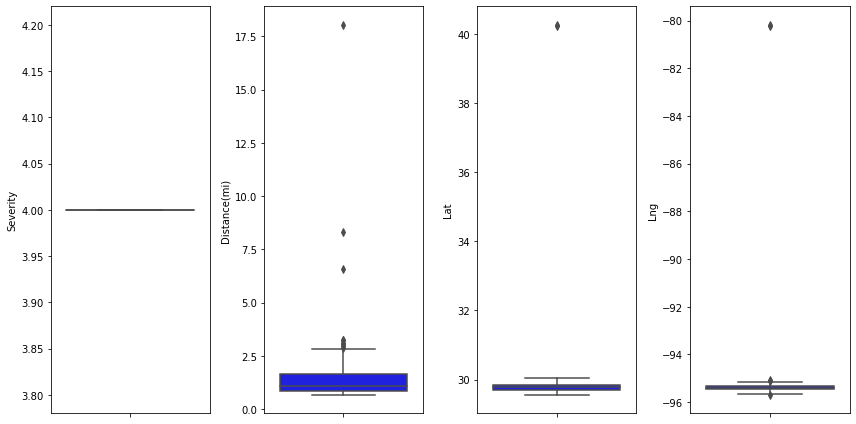

In [18]:
#explore data numerical distribution
features = ['Severity','Distance(mi)','Lat','Lng'] 

plt.figure(figsize=(12,6))
for i in range(0, len(features)):
    plt.subplot(1,4,i+1)
    sns.boxplot(df_houston_loc[features[i]],color = 'blue', orient = 'v' )
    plt.tight_layout()
    plt.savefig('EDA Numeric.png',dpi=300)


C:\Programming\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


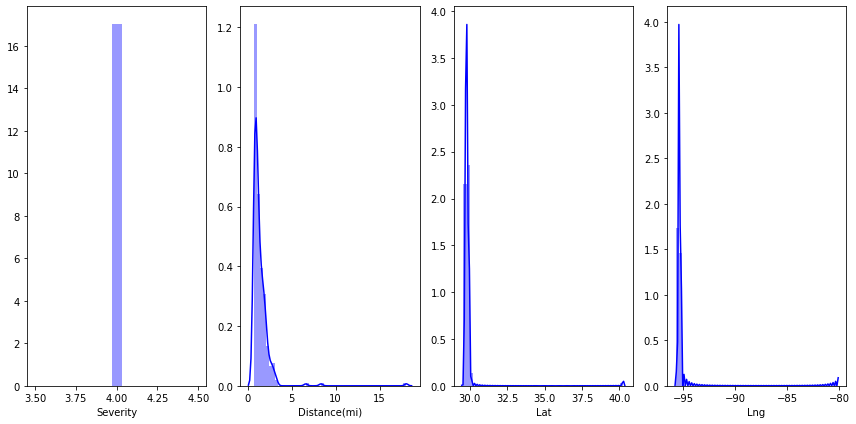

In [19]:
plt.figure(figsize=(12,6))
for i in range(0, len(features)):
    plt.subplot(1,4,i+1)
    sns.distplot(df_houston_loc[features[i]],color = 'blue', )
    plt.tight_layout()
    plt.savefig('EDA Numeric displot.png',dpi=300)

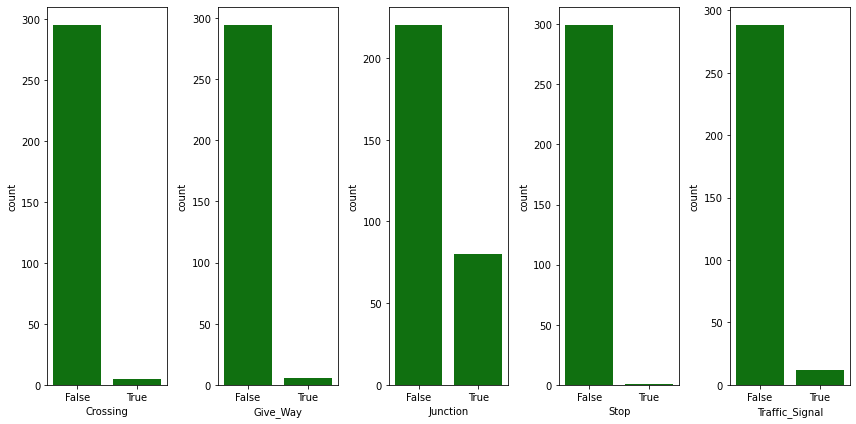

In [20]:
feature = ['Crossing','Give_Way','Junction','Stop','Traffic_Signal']
plt.figure(figsize = (12,6))
for i in range(0,len(feature)):
    plt.subplot(1,5, i+1)
    sns.countplot(df_houston_loc[feature[i]], color = 'green')
    plt.tight_layout()
    plt.savefig('EDA Categorical.png',dpi=300)

In [21]:
#visualizing the data into folium
houston_latitude = 29.749907
houston_longitude = -95.358421
map_houston = folium.Map(location=[houston_latitude, houston_longitude], zoom_start=11)

# add markers to map
for lat, lng, ID in zip(df_houston_loc['Lat'], df_houston_loc['Lng'], df_houston_loc['ID']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=ID,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_houston)  
    
map_houston


In [22]:
#data collecting from houston accident data is complete now we will use foursquare API to extract venues from given lat and lng
#defining foursquare confidential feature
CLIENT_ID = 'GJETG0WDO1VE2XFYO1EGVRPRQUKXMFFDVRSOUPVY3L5KIWEB' # your Foursquare ID
CLIENT_SECRET = 'WCSNKZMCAYIQZFVLQ5YCSVUKPFVUSY11H3OHZ1EYCB10IRRS' # your Foursquare Secret
VERSION = '20201210' # Foursquare API version
LIMIT = 500 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GJETG0WDO1VE2XFYO1EGVRPRQUKXMFFDVRSOUPVY3L5KIWEB
CLIENT_SECRET:WCSNKZMCAYIQZFVLQ5YCSVUKPFVUSY11H3OHZ1EYCB10IRRS


In [23]:
accident_latitude = df_houston_loc.loc[0, 'Lat'] # accident latitude value
accident_longitude = df_houston_loc.loc[0, 'Lng'] # accident longitude value

accident_id = df_houston_loc.loc[0, 'ID'] # accident ID

print('Latitude and longitude values of {} are {}, {}.'.format(accident_id, 
                                                               accident_latitude, 
                                                               accident_longitude))

Latitude and longitude values of A-2927313 are 29.901564999999998, -95.39826500000001.


In [24]:
# type your answer here

radius = 500


url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    accident_latitude, 
    accident_longitude, 
    radius, 
    LIMIT) # display URL

In [25]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fd98c5d0223702a3a0fb078'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Aldine',
  'headerFullLocation': 'Aldine',
  'headerLocationGranularity': 'city',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 29.906065004500004,
    'lng': -95.39308367588933},
   'sw': {'lat': 29.897064995499992, 'lng': -95.40344632411069}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e6d18b5d1649db799e858cb',
       'name': "Vanessa's Hot Dog Truck",
       'location': {'lat': 29.902617,
        'lng': -95.400405,
        'labeledLatLngs': [{'label': 'display',
          'lat': 29.902617,
          'lng': -95.400405

In [26]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [27]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Vanessa's Hot Dog Truck,Food Truck,29.902617,-95.400405
1,N T Auto Salvage,Convenience Store,29.902818,-95.400962


In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Accident ID', 
                  'Accident Latitude', 
                  'Accident Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

display(nearby_venues.head(3))

,name,categories,lat,lng
0,Vanessa's Hot Dog Truck,Food Truck,29.902617,-95.400405
1,N T Auto Salvage,Convenience Store,29.902818,-95.400962


In [29]:
df_venues = getNearbyVenues(names=df_houston_loc['ID'], latitudes=df_houston_loc['Lat'], longitudes=df_houston_loc['Lng'])

A-2927313
A-3431656
A-3018284
A-3436946
A-2885552
A-3233437
A-3010208
A-2491331
A-2677425
A-2661893
A-3445503
A-3141331
A-3010205
A-2663632
A-3444319
A-3232852
A-3361651
A-2635018
A-3384517
A-3095263
A-3416994
A-2508698
A-3372173
A-2847291
A-2507155
A-2508945
A-3385061
A-3398983
A-3061689
A-3291551
A-3251413
A-2677402
A-3113399
A-2505113
A-2495574
A-2501927
A-2660736
A-3476037
A-2635342
A-2807595
A-2807599
A-3392228
A-3222657
A-2662155
A-2623886
A-2492948
A-2623105
A-2691125
A-3413861
A-3016136
A-3058425
A-3077689
A-2503140
A-3431112
A-2784303
A-2784219
A-3352492
A-2690659
A-3253376
A-3113397
A-3413401
A-2662067
A-2634890
A-2662068
A-2661688
A-2690581
A-3361263
A-3476043
A-3383934
A-2495553
A-2705865
A-3380151
A-2623363
A-3322242
A-2623092
A-2660755
A-3330514
A-3053079
A-3451210
A-2883412
A-3385065
A-2506182
A-2706861
A-3095261
A-2636566
A-2811305
A-3378129
A-3431109
A-3235012
A-3508258
A-3455926
A-2499773
A-3127505
A-3115373
A-3431654
A-2498784
A-2507148
A-2506708
A-3427325
A-2730755


In [30]:
df_venues.shape

(3167, 7)

In [31]:
df_venues.head(5)

,Accident ID,Accident Latitude,Accident Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,A-2927313,29.901565,-95.398265,Vanessa's Hot Dog Truck,29.902617,-95.400405,Food Truck
1,A-2927313,29.901565,-95.398265,N T Auto Salvage,29.902818,-95.400962,Convenience Store
2,A-3431656,29.978639,-95.553809,Prestonwood,29.981313,-95.556624,Historic Site
3,A-3431656,29.978639,-95.553809,Camp Gladiator - Kara,29.980990,-95.550210,Gym / Fitness Center
4,A-3018284,29.867275,-95.395930,Puro Norte,29.870352,-95.398099,Mexican Restaurant


In [32]:
#unique value from venue category
print('There is {0}'.format(len(df_venues['Venue Category'].unique())))

There is 284


In [33]:
venues_onehot = pd.get_dummies(data = df_venues[['Venue Category']],prefix="",prefix_sep="")
venues_onehot['Accident ID'] = df_venues['Accident ID']

fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

In [34]:
display(venues_onehot.head(5))

,Accident ID,ATM,Accessories Store,Adult Boutique,Advertising Agency,Airport,Airport Terminal,American Restaurant,Andhra Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Astrologer,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beer Bar,Beer Garden,Beer Store,Beijing Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Check Cashing Service,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,EV Charging Station,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fireworks Store,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Marine Terminal,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mongolian Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Moving Target,Multiplex,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pizza Place,Playground,Plaza,Pool,Pool Hall,Post Office,Print Shop,Pub,Public Art,RV Park,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Street Art,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toll Plaza,Tourist Information Center,Toy / Game Store,Track,Trail,Travel & Transport,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese

In [35]:
print(venues_onehot.shape)

(3167, 285)


In [78]:
venues_grouped = venues_onehot.groupby('Accident ID').sum().reset_index()
display(venues_grouped.head())
print(venues_grouped.shape)

,Accident ID,ATM,Accessories Store,Adult Boutique,Advertising Agency,Airport,Airport Terminal,American Restaurant,Andhra Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Astrologer,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beer Bar,Beer Garden,Beer Store,Beijing Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Check Cashing Service,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,EV Charging Station,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fireworks Store,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Marine Terminal,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mongolian Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Moving Target,Multiplex,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pizza Place,Playground,Plaza,Pool,Pool Hall,Post Office,Print Shop,Pub,Public Art,RV Park,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Street Art,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toll Plaza,Tourist Information Center,Toy / Game Store,Track,Trail,Travel & Transport,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese

(291, 285)


In [79]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]



In [102]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Accident ID']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
houston_accident_sorted = pd.DataFrame(columns=columns)
houston_accident_sorted['Accident ID'] = venues_grouped['Accident ID']

for ind in np.arange(venues_grouped.shape[0]):
    houston_accident_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

display(houston_accident_sorted.head())
print(houston_accident_sorted.shape)


,Accident ID,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,A-2491331,Hotel,Intersection,Deli / Bodega
1,A-2491368,Coffee Shop,Men's Store,Rental Car Location
2,A-2491949,Thrift / Vintage Store,Food Truck,Storage Facility
3,A-2492144,Storage Facility,Gym / Fitness Center,Escape Room
4,A-2492220,Fast Food Restaurant,Mobile Phone Shop,Breakfast Spot


(291, 4)


In [103]:
df_houston_loc.sample(5)

,ID,Severity,Distance(mi),Crossing,Give_Way,Junction,Stop,Traffic_Signal,Lat,Lng
227,A-2985656,4,0.832,False,False,True,False,False,29.775550,-95.264345
232,A-3441020,4,0.820,False,False,False,False,False,29.745530,-95.361450
261,A-2973491,4,0.759,False,False,True,False,False,29.849810,-95.333765
217,A-3306595,4,0.867,False,False,False,False,False,29.781510,-95.452220
190,A-3428188,4,0.973,False,False,False,False,False,29.908979,-95.412320


In [104]:
#creating other dataset to merge into the houston_accident_sorted
df_to_merge = df_houston_loc.drop(['Severity','Distance(mi)'],axis=1)
df_to_merge = df_to_merge.rename({'ID':'Accident ID'},axis=1)
df_to_merge.head(3)

,Accident ID,Crossing,Give_Way,Junction,Stop,Traffic_Signal,Lat,Lng
0,A-2927313,False,False,False,False,False,29.901565,-95.398265
1,A-3431656,False,False,True,False,False,29.978639,-95.553809
2,A-3018284,False,False,False,False,False,29.867275,-95.395930


In [105]:
df_ml_model = pd.merge(venues_grouped,df_to_merge, on='Accident ID')
display(df_ml_model.head(4))
print(df_ml_model.shape)

,Accident ID,ATM,Accessories Store,Adult Boutique,Advertising Agency,Airport,Airport Terminal,American Restaurant,Andhra Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Astrologer,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beer Bar,Beer Garden,Beer Store,Beijing Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Check Cashing Service,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,EV Charging Station,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fireworks Store,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Marine Terminal,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mongolian Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Moving Target,Multiplex,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pizza Place,Playground,Plaza,Pool,Pool Hall,Post Office,Print Shop,Pub,Public Art,RV Park,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Street Art,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toll Plaza,Tourist Information Center,Toy / Game Store,Track,Trail,Travel & Transport,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese

(291, 292)


# K Means Clustering

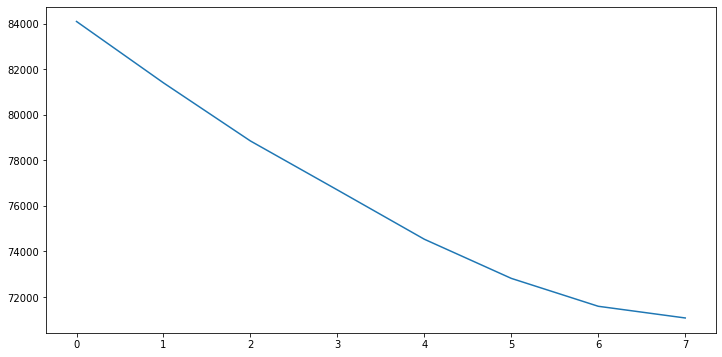

In [159]:
inertia = []

houston_accident_clustering = df_ml_model.drop(['Accident ID','Lat','Lng'], 1)
x_clustering = houston_accident_clustering.values
x_clustering = preprocessing.StandardScaler().fit(x_clustering).transform(x_clustering.astype(float))

for i in range(1, 9):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(x_clustering)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia)

Optimal Cluster from elbow method above is n=6

In [107]:
# set number of clusters
kclusters = 6


# run k-means clustering
kmeans_final = KMeans(n_clusters=kclusters, random_state=0).fit(houston_accident_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_final.labels_[0:10] 

array([1, 2, 2, 2, 0, 2, 2, 2, 2, 2])

In [108]:
# add clustering labels
df_road_feature = df_to_merge.drop(['Lat','Lng'],axis=1)
df_lat_lng = df_to_merge.drop(['Crossing','Give_Way','Junction','Stop','Traffic_Signal'],axis=1)

display(df_road_feature.head(3))
display(df_lat_lng.head(3))

,Accident ID,Crossing,Give_Way,Junction,Stop,Traffic_Signal
0,A-2927313,False,False,False,False,False
1,A-3431656,False,False,True,False,False
2,A-3018284,False,False,False,False,False


,Accident ID,Lat,Lng
0,A-2927313,29.901565,-95.398265
1,A-3431656,29.978639,-95.553809
2,A-3018284,29.867275,-95.395930


In [109]:
# add clustering labels
houston_accident_sorted.insert(0, 'Cluster Labels', kmeans_final.labels_)

houston_merged = pd.merge(df_lat_lng,houston_accident_sorted, on='Accident ID')
houston_merged = pd.merge(houston_merged, df_road_feature, on='Accident ID')

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood

houston_merged.head(5)

,Accident ID,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Crossing,Give_Way,Junction,Stop,Traffic_Signal
0,A-2927313,29.901565,-95.398265,2,Convenience Store,Food Truck,Fish Market,False,False,False,False,False
1,A-3431656,29.978639,-95.553809,2,Historic Site,Gym / Fitness Center,Yoga Studio,False,False,True,False,False
2,A-3018284,29.867275,-95.395930,2,Mexican Restaurant,Botanical Garden,Yoga Studio,False,False,False,False,False
3,A-3436946,29.978606,-95.563160,2,Fast Food Restaurant,Hardware Store,Pool,False,False,False,False,False
4,A-2885552,29.978595,-95.389575,2,Multiplex,Rental Car Location,Sandwich Place,False,False,False,False,False


In [110]:
# create map
map_clusters = folium.Map(location=[houston_latitude, houston_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(houston_merged['Lat'], houston_merged['Lng'], houston_merged['Accident ID'], houston_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [131]:
#Showing cluster 1
houston_merged_0 = houston_merged[houston_merged['Cluster Labels'] ==0]
display(houston_merged_0.sample(5))
display(houston_merged_0['1st Most Common Venue'].value_counts())


,Accident ID,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Crossing,Give_Way,Junction,Stop,Traffic_Signal
117,A-3103835,29.947725,-95.415710,0,Fast Food Restaurant,Shoe Store,Department Store,False,False,False,False,False
201,A-3341564,29.821405,-95.470815,0,Hotel,Paper / Office Supplies Store,Mobile Phone Shop,False,False,False,False,False
228,A-3463090,29.922945,-95.412395,0,Mexican Restaurant,Mobile Phone Shop,Fast Food Restaurant,False,False,False,False,False
21,A-2847291,29.669940,-95.264645,0,Pool Hall,Chinese Restaurant,Coffee Shop,False,False,False,False,False
67,A-2495553,29.913970,-95.412070,0,Fast Food Restaurant,Furniture / Home Store,Clothing Store,False,False,False,False,False


Mexican Restaurant               8
Fast Food Restaurant             5
Chinese Restaurant               4
Clothing Store                   3
Hotel                            2
Sandwich Place                   2
Pharmacy                         2
Fried Chicken Joint              2
American Restaurant              2
Pool Hall                        1
Paper / Office Supplies Store    1
Mobile Phone Shop                1
Coffee Shop                      1
Asian Restaurant                 1
Seafood Restaurant               1
Cosmetics Shop                   1
Discount Store                   1
Rental Car Location              1
Name: 1st Most Common Venue, dtype: int64

In [132]:
#Showing cluster 2
houston_merged_1 = houston_merged[houston_merged['Cluster Labels']==1]
display(houston_merged_1.head(5))
display(houston_merged_1['1st Most Common Venue'].value_counts())

,Accident ID,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Crossing,Give_Way,Junction,Stop,Traffic_Signal
7,A-2491331,29.939415,-95.328140,1,Hotel,Intersection,Deli / Bodega,False,False,False,False,False
28,A-3251413,29.837905,-95.490925,1,Hotel,Fast Food Restaurant,Donut Shop,False,False,False,False,False
33,A-2501927,29.716190,-95.498240,1,Indian Restaurant,Fast Food Restaurant,Hotel,False,False,False,False,False
85,A-3431109,29.713967,-95.502513,1,Indian Restaurant,Hotel,Sandwich Place,False,False,False,False,False
92,A-2498784,29.939050,-95.362650,1,Hotel,Home Service,Yoga Studio,False,False,False,False,False


Hotel                 13
Indian Restaurant      2
Mexican Restaurant     1
Name: 1st Most Common Venue, dtype: int64

In [134]:
#Showing cluster 3
houston_merged_2 = houston_merged[houston_merged['Cluster Labels']==2]
display(houston_merged_2.head(5))
display(houston_merged_2['1st Most Common Venue'].value_counts())

,Accident ID,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Crossing,Give_Way,Junction,Stop,Traffic_Signal
0,A-2927313,29.901565,-95.398265,2,Convenience Store,Food Truck,Fish Market,False,False,False,False,False
1,A-3431656,29.978639,-95.553809,2,Historic Site,Gym / Fitness Center,Yoga Studio,False,False,True,False,False
2,A-3018284,29.867275,-95.395930,2,Mexican Restaurant,Botanical Garden,Yoga Studio,False,False,False,False,False
3,A-3436946,29.978606,-95.563160,2,Fast Food Restaurant,Hardware Store,Pool,False,False,False,False,False
4,A-2885552,29.978595,-95.389575,2,Multiplex,Rental Car Location,Sandwich Place,False,False,False,False,False


Mexican Restaurant           16
Hotel                        13
Rental Car Location          11
Furniture / Home Store        9
Convenience Store             8
                             ..
Fireworks Store               1
Vietnamese Restaurant         1
Cajun / Creole Restaurant     1
Shop & Service                1
Multiplex                     1
Name: 1st Most Common Venue, Length: 85, dtype: int64

In [135]:
#Showing cluster 4
houston_merged_3 = houston_merged[houston_merged['Cluster Labels']==3]
display(houston_merged_3.head(5))
display(houston_merged_3['1st Most Common Venue'].value_counts())

,Accident ID,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Crossing,Give_Way,Junction,Stop,Traffic_Signal
236,A-3215818,29.80883,-95.16367,3,Fast Food Restaurant,Pizza Place,Sandwich Place,False,False,False,False,False


Fast Food Restaurant    1
Name: 1st Most Common Venue, dtype: int64

In [136]:
#Showing cluster 5
houston_merged_4 = houston_merged[houston_merged['Cluster Labels']==4]
display(houston_merged_4.head(5))
display(houston_merged_4['1st Most Common Venue'].value_counts())

,Accident ID,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Crossing,Give_Way,Junction,Stop,Traffic_Signal
31,A-2505113,29.753685,-95.356740,4,Hotel,Bar,Baseball Stadium,False,False,True,False,False
76,A-3451210,29.752688,-95.365167,4,Hotel,New American Restaurant,Lounge,False,False,False,False,False
197,A-3363834,29.750912,-95.357396,4,New American Restaurant,Coffee Shop,Bar,False,False,False,False,False


Hotel                      2
New American Restaurant    1
Name: 1st Most Common Venue, dtype: int64

In [138]:
#Showing cluster 6
houston_merged_5 = houston_merged[houston_merged['Cluster Labels']==5]
display(houston_merged_5.head(5))
display(houston_merged_5['1st Most Common Venue'].value_counts())

,Accident ID,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Crossing,Give_Way,Junction,Stop,Traffic_Signal
142,A-2771222,29.784175,-95.529460,5,Furniture / Home Store,Sandwich Place,New American Restaurant,False,False,False,False,False
214,A-3132283,29.784365,-95.530365,5,Furniture / Home Store,Liquor Store,Sandwich Place,False,False,False,False,False


Furniture / Home Store    2
Name: 1st Most Common Venue, dtype: int64

In [154]:
koloms = ['Cluster','Most Common Venues','Total']
clusterst = ['Cluster 0 (Mexican Restaurant)','Cluster 1 (Hotel)','Cluster 2 (Mexican Restaurant)','Cluster 3 (Fast Food Restaurant)','Cluster 4 (Hotel)','Cluster 5 (Furniture/Home Store)']
list1 = ['Mexican restaurant','Hotel','Mexican Restaurant','Fast Food Restaurant','Hotel','Furniture/Home Store']
list2 = [8,13,16,1,2,2]
df_comparison = pd.DataFrame(list(zip(clusterst,list1,list2)),columns = koloms)

In [155]:
df_comparison.head(6)

,Cluster,Most Common Venues,Total
0,Cluster 0 (Mexican Restaurant),Mexican restaurant,8
1,Cluster 1 (Hotel),Hotel,13
2,Cluster 2 (Mexican Restaurant),Mexican Restaurant,16
3,Cluster 3 (Fast Food Restaurant),Fast Food Restaurant,1
4,Cluster 4 (Hotel),Hotel,2
5,Cluster 5 (Furniture/Home Store),Furniture/Home Store,2


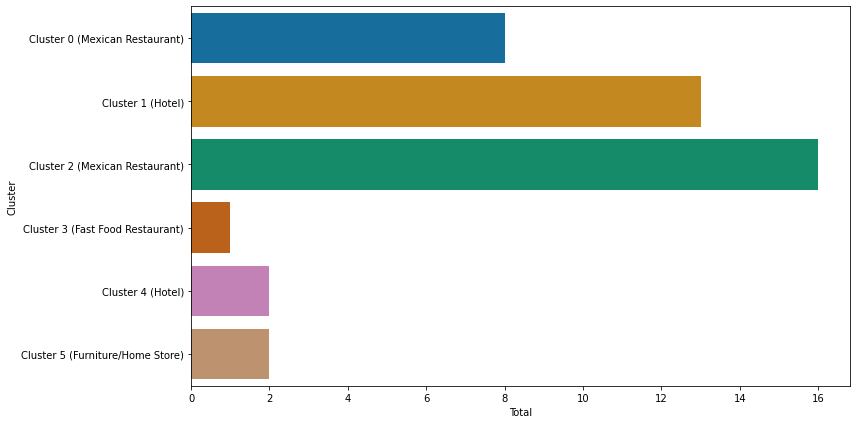

In [157]:
plt.figure(figsize = (12,6))
sns.barplot(data=df_comparison, x='Total', y='Cluster',orient = 'h',palette = 'colorblind')
plt.tight_layout()